# Air transport. Passengers carried vs GDP

In [84]:
import pandas as pd
import plotly.graph_objects as go

### Download files from WordBank

In [85]:
file_air  = 'http://api.worldbank.org/v2/en/indicator/IS.AIR.PSGR?downloadformat=excel'
file_gdp  = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel'
file_pop  = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel'

In [86]:
df_air_data = pd.read_excel(file_air, skiprows = 3)
df_gdp_data = pd.read_excel(file_gdp, skiprows = 3)
df_pop_data = pd.read_excel(file_pop, skiprows = 3)

##### Let look at our data and make some manipulation

In [87]:
df_air_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,1999127.0,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,1010194.0,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,768533.0,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,9.463542e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [89]:
df_pop_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [90]:
columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969','2019']
df_air_data.drop(columns, inplace=True, axis=1)
df_gdp_data.drop(columns, inplace=True, axis=1)

In [91]:
df_pop = df_pop_data[['Country Name','Country Code', '2018']]
df_pop.head()

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0


In [92]:
df_air = df_air_data[['Country Name','Country Code', '2018']].dropna()
df_air.head()

,Country Name,Country Code,2018
0,Aruba,ABW,2.742800e+05
1,Afghanistan,AFG,1.722613e+06
2,Angola,AGO,1.516628e+06
3,Albania,ALB,3.031370e+05
5,Arab World,ARB,2.282752e+08


##### Let calculate amount of Passengers carried by Air transport per capita

In [93]:
df_air_pop = pd.merge(df_air, df_pop, how = 'inner', left_on = 'Country Code', right_on = 'Country Code')

In [94]:
df_air_pop ['air_coef'] = df_air_pop['2018_x']/df_air_pop['2018_y']
df_air_pop = df_air_pop[['Country Name_x','Country Code','air_coef']]
df_air_pop.rename(columns={'Country Name_x': 'Country Name'}, inplace=True)

In [95]:
# look at top 5 countries
df_air_pop = df_air_pop.sort_values(by=['air_coef'], ascending=False).dropna()
df_air_pop.head()

,Country Name,Country Code,air_coef
80,Ireland,IRL,34.433481
83,Iceland,ISL,22.169762
151,Qatar,QAT,10.489688
5,United Arab Emirates,ARE,9.919372
159,Singapore,SGP,7.165071


In [96]:
# look at 5 countries with least value of an coef
df_air_pop.tail()

,Country Name,Country Code,air_coef
170,Syrian Arab Republic,SYR,0.001059
128,Malawi,MWI,0.000581
197,Zambia,ZMB,0.000513
185,Uganda,UGA,0.000504
162,Somalia,SOM,0.000299


In [97]:
# let plot map
fig = go.Figure(data=go.Choropleth(
    locations=df_air_pop['Country Code'], 
    z = df_air_pop['air_coef'].astype(float),
    colorscale = 'bluyl',
    colorbar_title = "Coef",
))

fig.update_layout(
    title_text = '<b>2018. Passengers carried by air transport. Per capita <b>',
    title_x=0.5,
        geo=dict(
        showframe=False,
        showcoastlines=False
        #projection_type='equirectangular'
    ))

fig.show()

In [98]:
# create a function to plot a comparison of growth of passengers of Air transrpot and GDP of a country
def plot_compare_pas_gdp (country_name, data_pas, data_GDP):
    import numpy as np
    import pandas as pd
    from sklearn import preprocessing
    import matplotlib.pyplot as plt
    %matplotlib notebook
    
    df_air = data_pas[data_pas['Country Code'] == country_name].T
    df_gdp = data_GDP[data_GDP['Country Code'] == country_name].T
    df_tot = pd.merge (df_air, df_gdp, how = 'inner', left_index=True, right_index=True)
    df_tot.drop(df_tot.index[:4], inplace=True)
    df_tot.columns = ['AIR_PASS', 'GDP']
    X = np.asarray(df_tot[['AIR_PASS']])
    Y = np.asarray(df_tot[['GDP']])
    X = preprocessing.StandardScaler().fit(X).transform(X) # normalize data 
    Y = preprocessing.StandardScaler().fit(Y).transform(Y) # normalize data
    plt.figure(figsize = (10,6))
    plt.plot(X, '--.', c = 'orange')
    plt.plot(Y, '--.', c = 'b')
    ax = plt.gca()
    plt.legend(['PASS', 'GDP'])
    ax.set_xticks(list(range(len(df_tot.index))))
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_xticklabels(df_tot.index)
    ax.set_title(country_name +'. '+'Correlation between amount of passengers, carried by air transport and GDP' )
    #ax.tick_params(right= False,top= False,left= False, bottom= True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_position('zero')
    plt.tick_params(top=False, bottom=True, left=False, right=False,
                labelleft=False, labelbottom=True, labelsize=7)
    plt.show()

<IPython.core.display.Javascript object>


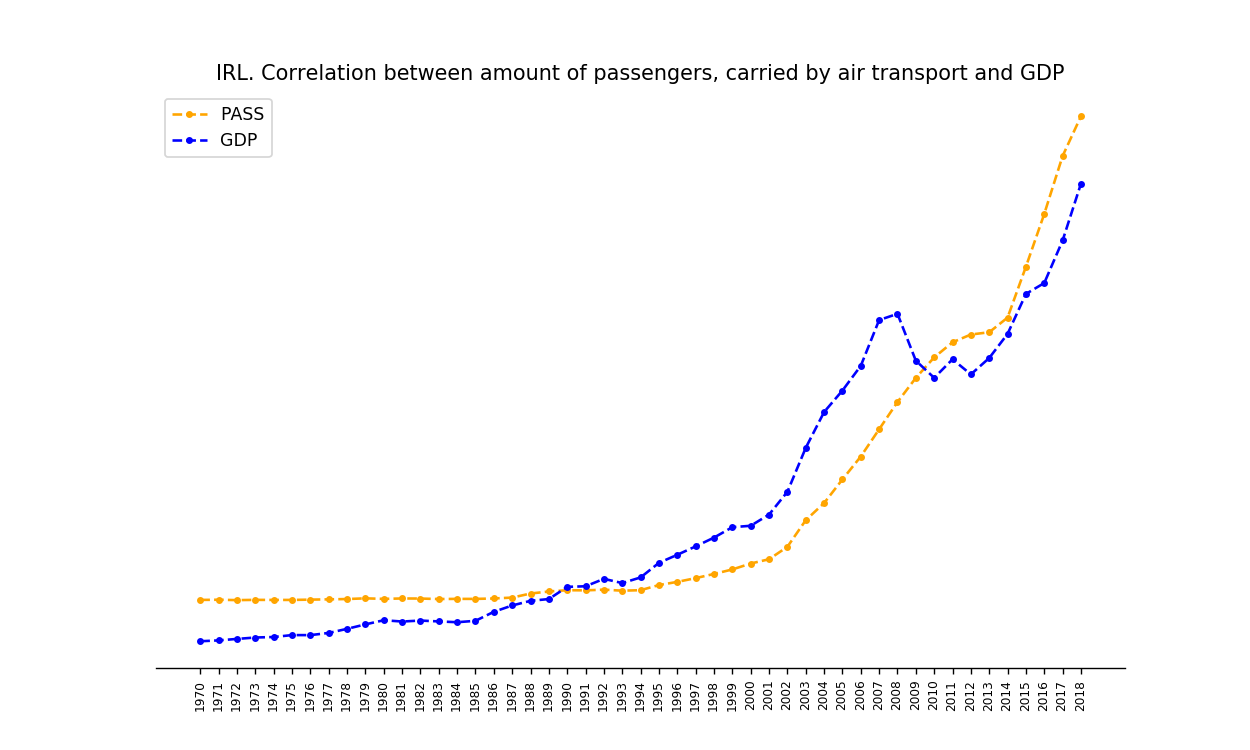

In [99]:
# let look at top 1 contry - Ireland
plot_compare_pas_gdp ('IRL', df_air_data,  df_gdp_data)

<IPython.core.display.Javascript object>


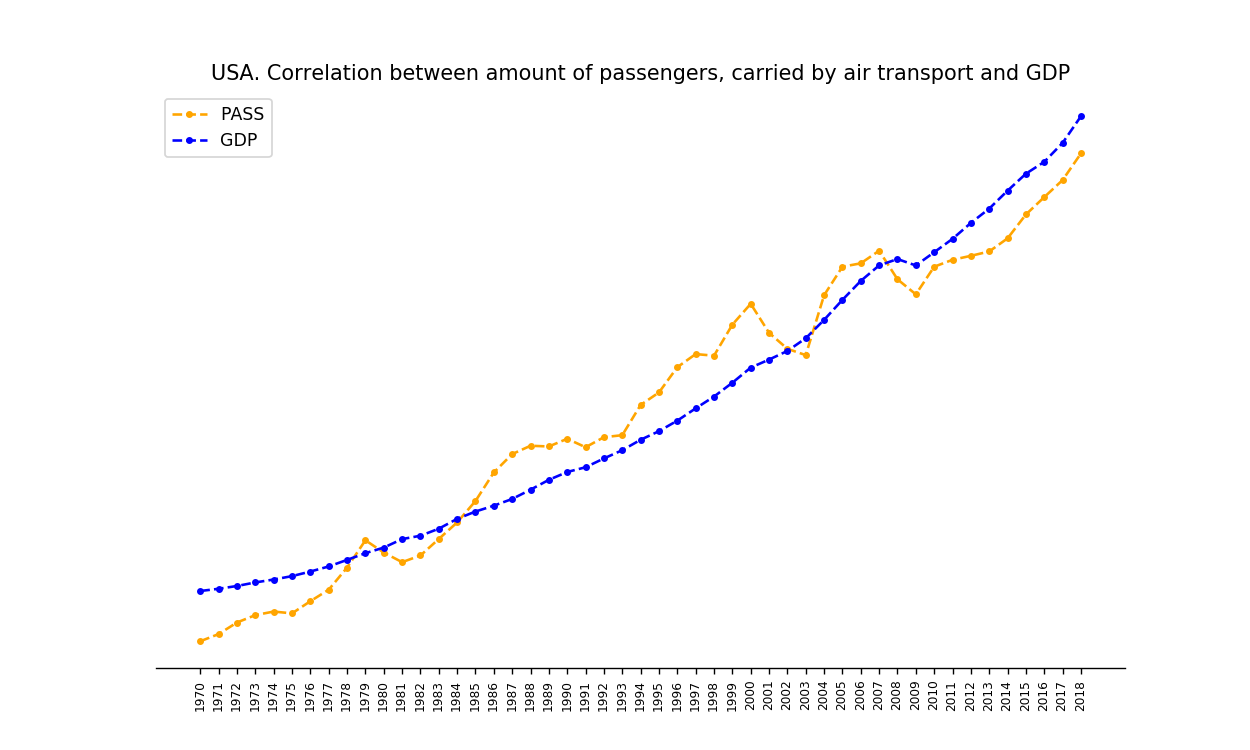

In [100]:
# let look at USA
plot_compare_pas_gdp ('USA', df_air_data,  df_gdp_data)

<IPython.core.display.Javascript object>


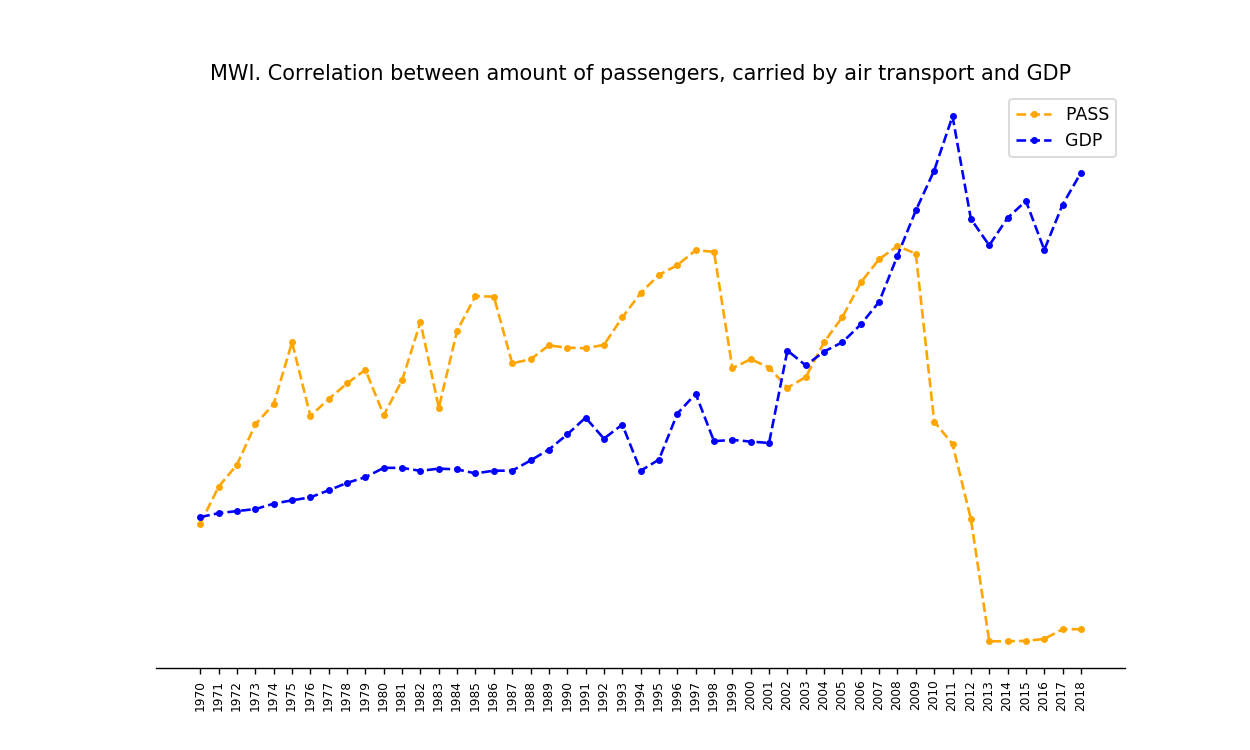

In [101]:
# let look at country with one of the least value of coef
plot_compare_pas_gdp ('MWI', df_air_data,  df_gdp_data)